# TAREA 1 : Grupo 8 (**Javier Muñoz de Torres y Alvaro Morán Lorente**)<br>


**Datos**: Trabajaremos con un conjunto de datos del ambito de medicina/salud, concretamente en relación a problemas al corazón. Los datos vienen de la unión de otros 4 datasets procedentes de Cleveland; Hungary; Switzerland y VA Long Beach, y han sido tomados de pacientes de hospitales.

**Base de datos**: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)<br>
En el conjunto de datos el target `num` es categórica, por lo que nos centraremos en una tarea de clasificación. Tiene un rango (0,4), es decir, 5 posibles niveles, que indican de menor a mayor la presencia de un problema en el corazon. El objetivo de este análisis es clasificar los pacientes, dados los atributos que mostraremos a continuación, según "la presencia de problemas" de corazon, lo que se puede interpretar con "como de probable es que tengas un problema de corazón".

**Interpretación del target:** <br>
Para darle un significado a ese rango (0,4), diremos que:<br>
`0` &rarr; Poco probable<br>
`1` &rarr; Algo probable<br>
`2` &rarr; Probable<br>
`3` &rarr; Bastante probable<br>
`4` &rarr; Muy probable<br>
Para nuestro análisis binarizaremos la variable objetivo (**`target`**). Asignaremos como clase positiva `1` aquellos diagnósticos en los que el estrechamiento de arterias es superior al 50% (problemas graves de corazón) y le asignaremos la clase negativa `0` a aquellos casos en los que el estrechamiento de arterias sea inferior al 50% (ausencia de problemas de corazón).
A continuación, analizaremos los atributos (features):

## Sección I. Análisis descriptivo y exploratorio de la base de datos. Preprocesamiento

### *Primer vistazo a los datos*

In [1]:
import warnings
import numpy as np

warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
heart_disease = fetch_ucirepo(id=45)
# Datos (dataframes de pandas)
X = heart_disease.data.features # Features
Y = heart_disease.data.targets # Target
# Ajustamos el tipo de las variables categóricas
categorical_features = ['sex','fbs','exang','cp', 'restecg', 'slope', 'thal']
X[categorical_features] = X[categorical_features].astype('category')


Lo primero que hemos hecho ha sido guardar en una variable nuestro conjunto de datos. A continuación, hemos separado en dos DataFrames distintos tanto el target `Y` como las características `X` del conjunto de datos.


In [3]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Podemos observar que tenemos una mezcla de variables categoricas y numéricas, por lo que deberemos tenerlo en cuenta ya que habra que hacer alguna modificación con dichas variables categóricas en función de que tipo de modelo usemos (probablemente las utilizaremos en el formato one hot encoding).  
De entre nuestras características vemos que `ca` y `thal` contienen valores faltantes, por lo que tendremos que tratarlos posteriormente.
Como comentamos anteriormente vemos que el target presenta 5 categorias, pero nosotros los binarizaremos distinguiendo entre "presencia de problemas de corazón" (categorias: `1`, `2`, `3`, `4`) y "ausencia de problemas de corazón" (categoría: `0`).  

In [4]:
from sklearn.model_selection import train_test_split
# Diseño y Test
X_diseño, X_test, Y_diseño, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123) # 70% Diseño , 30% Test

# EN GRIDSEARCH SE LE METE EL CONJUNTO DE DISEÑO, NO TRAIN, EL SOLO TE HACE LA DIVISION #

# Train y Validation
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_diseño, Y_diseño, test_size=0.3, random_state=123) # 70% Train, 30% Validation#


Separamos nuestro conjunto de datos en 3 subconjuntos (`train`, `validation` y `test`). Train y validation pertenecen al conjunto de **diseño**, el cual contiene un 70% de la muestra, y **test** contiene un 30%.  

In [5]:
X_Train.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,148.000000,148.000000,148.000000,148.000000,148.000000,146.000000
mean,54.668919,132.074324,245.858108,148.527027,1.154054,0.657534
std,8.938481,17.848985,53.731255,22.366291,1.228426,0.897801
min,29.000000,94.000000,131.000000,96.000000,0.000000,0.000000
25%,49.750000,120.000000,211.750000,135.000000,0.000000,0.000000
50%,55.000000,130.000000,242.500000,149.500000,0.900000,0.000000
75%,61.000000,140.000000,269.250000,165.250000,1.800000,1.000000
max,76.000000,192.000000,564.000000,202.000000,6.200000,3.000000


Las variables continuas tienen rangos distintos, de modo que habrá que normalizarlas para su posterior visualización y uso en ciertos modelos de machine learning.

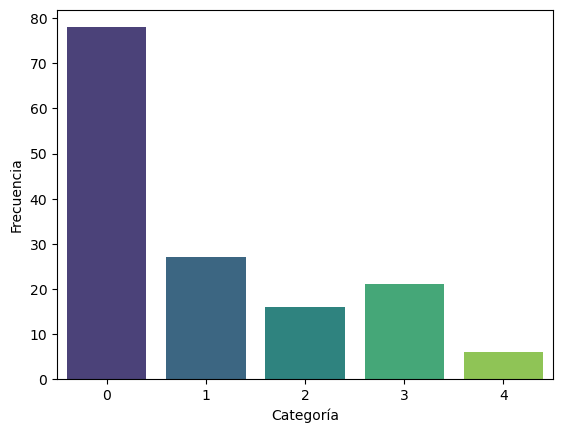

In [6]:
sns.countplot(x='num',data=Y_Train, palette="viridis")
plt.ylabel('Frecuencia')
plt.xlabel('Categoría')
plt.show()

Al visualizar la distribución de las clases de nuestra variable objetivo vemos que las clases están desbalanceadas, siendo la clase `0` la más frecuente.  
Procedemos a binarizar el target.  

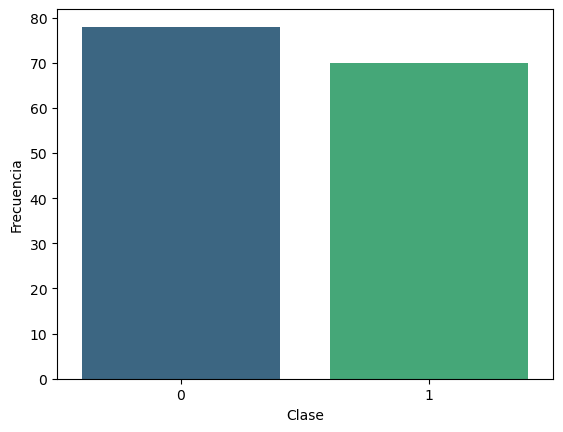

In [7]:
# Pasamos el target a binario
Y_Train[Y_Train >= 1] = 1
Y_Val[Y_Val >= 1] = 1
Y_test[Y_test >=1] = 1
sns.countplot(x='num',data=Y_Train, palette="viridis")
plt.ylabel('Frecuencia')
plt.xlabel('Clase')
plt.show()

Con las nuevas clases nos ha quedado una distribución mas balanceada, por lo que a la hora de usar figuras de mérito tenemos más libertad de elección. Sin embargo, en este modelo es más relevante predecir correctamente la clase en personas que tienen potenciales problemas de corazón para que las que no, por lo que nos centraremos en acertar los verdaderos positivos, y no tanto los verdaderos negativos.

### *Descripción de variables*



#### Features

`age`: Edad del paciente tratado <br>
+ **Entera** [min = *29*, max = *76*]
+ **Unidades** &rarr; Años

`sex`: Sexo del paciente tratado <br>
+ **Binaria** [**1** = *hombre*, **0** = *mujer*]
+ **Unidades** &rarr; Sin unidades

`cp`: Tipo de dolor en el pecho <br>
+ **Categórica** [*Angina típica, angina atípica, dolor no anginoso, asintomático*]
+ **Unidades** &rarr; Sin unidades

`trestbps`: Presión arterial en reposo al llegar al hospital<br>
+ **Continua** [min = *94*, max = *192*]
+ **Unidades** &rarr; mm-Hg

`chol`: Colesterol sérico<br>
+ **Continua** [min = *131*, max = *564*]
+ **Unidades** &rarr; mg/dl

`fbs`: Glucemia (azucar en sangre) en ayunas<br>
+ **Binaria** [**1** = *>120*, **0** = *<120*]
+ **Unidades** &rarr; mg/dl

`restecg`: Resultados electrocardiográficos en reposo<br>
+ **Categórica** [**0** = normal,   **1** = con anomalía de la onda ST-T,   **2** = mostrando hipertrofia ventricular izquierda probable o definida según los criterios de Estes]
+ **Unidades** &rarr; Sin unidades

`thalach`: Frecuencia cardíaca máxima alcanzada<br>
+ **Entera** [min = *96*, max = *202*]
+ **Unidades** &rarr;  **?¿?¿?¿?¿?¿??¿??¿?**

`exang`: Angina inducida por el ejercicio<br>
+ **Binaria** [**1** = **Yes**, **0** = **No**]
+ **Unidades** Sin unidades

`oldpeak`: Depresión del segmento ST inducida por el ejercicio en relación con el reposo<br>
+ **Entera** [min = **0** = min, max = **6.2**]
+ **Unidades** ?¿?¿?¿¿?¿?¿?¿?¿??¿?

`slope`: La pendiente del segmento ST en el pico del ejercicio <br>
+ **Categórica** [*Pendiente ascendente , plana, pendiente descendente*]
+ **Unidades** &rarr; Sin unidades

`ca`: Número de vasos principales (0-3) coloreados por fluoroscopia <br>
+ **Entera** [min = **0**, max = **3**]
+ **Unidades** &rarr; Sin unidades

`thal`: Prueba de tálamo o talio <br>
+ **Categórica** [*Normal , efecto fijo, efecto reversble*]
+ **Unidades** &rarr; Sin unidades

#### Target<br>

`num`: Diagnóstico de patología del corazón (estrechamiento/estenosis de las arterias coronarias)<br>
+ **Binaria** [**1** = **Estrechamiento>50%: grave**, **0** = **Estrechamiento<50%: leve**]
+ **Unidades** &rarr; Sin unidades

### Estandarización de los datos

Como hemos mencionado previamente, las variables continuas tienen distintas escalas, por lo que vamos a estandarizarlas para poder calcular distancias de forma correcta.

In [8]:
continuous_features = X_Train.select_dtypes(include=['float64', 'int64']).columns


X_Train_scaled = X_Train.copy()
X_Val_scaled = X_Val.copy()
X_test_scaled = X_test.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Train_scaled[continuous_features] = scaler.fit_transform(X_Train_scaled[continuous_features])

X_Val_scaled[continuous_features] = scaler.transform(X_Val_scaled[continuous_features])

X_test_scaled[continuous_features] = scaler.transform(X_test_scaled[continuous_features])

### Missing Values


A continuación vamos a analizar las variables `ca` y `thal`, las cuales sabemos que contiene valores faltantes gracias al proveedor de los datos. <br>

Como `ca` acepta el valor **0** vamos a considerar como valores faltantes a los **NaN**, y al ser `thal` una variable categórica, no puede contener, por lo que vamos a usar el mismo criterio.

In [9]:

# Buscar Nulls (NaN)
print("Numero de NaN en ca :",X["ca"].isnull().sum())
print("Numero de NaN en thal:",X["thal"].isnull().sum())
print("Numero de NaN en ca en Train:",X_Train["ca"].isnull().sum())
print("Numero de NaN en thal en Train:",X_Train["thal"].isnull().sum())

Numero de NaN en ca : 4
Numero de NaN en thal: 2
Numero de NaN en ca en Train: 2
Numero de NaN en thal en Train: 0


Como se puede ver, el conjunto de datos contiene algunos valores faltantes en ambas variables; sin embargo, al realizar la partición, `thal` no contiene valores faltantes en este subconjunto. Vamos a proceder con el tratamiento de estos NaN. Dado que son pocos, el tipo de tratamiento que apliquemos no es muy relevante. Sin embargo, realizaremos la imputación considerando un número mayor de NaN, utilizando el método de **k-NN**.

In [10]:
from sklearn.impute import SimpleImputer, KNNImputer


# Imputadores
knn_imputer = KNNImputer(n_neighbors=3)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Separar las columnas numéricas y categóricas de X_Train_scaled
X_Train_continuous = X_Train_scaled[continuous_features]
X_Train_categorical = X_Train_scaled[categorical_features]

# Imputar las columnas numéricas
X_Train_continuous_imputed = knn_imputer.fit_transform(X_Train_continuous)
X_Train_continuous_imputed = pd.DataFrame(X_Train_continuous_imputed, columns=continuous_features)

# Imputar las columnas categóricas
X_Train_categorical_imputed = cat_imputer.fit_transform(X_Train_categorical)
X_Train_categorical_imputed = pd.DataFrame(X_Train_categorical_imputed, columns=categorical_features)

# Concatenar de nuevo
X_Train_scaled = pd.concat([X_Train_continuous_imputed, X_Train_categorical_imputed], axis=1)

# Repetir el proceso para X_test_scaled
X_test_continuous = X_test_scaled[continuous_features]
X_test_categorical = X_test_scaled[categorical_features]

X_test_continuous_imputed = knn_imputer.transform(X_test_continuous)
X_test_continuous_imputed = pd.DataFrame(X_test_continuous_imputed, columns=continuous_features)

X_test_categorical_imputed = cat_imputer.transform(X_test_categorical)
X_test_categorical_imputed = pd.DataFrame(X_test_categorical_imputed, columns=categorical_features)

X_test_scaled = pd.concat([X_test_continuous_imputed, X_test_categorical_imputed], axis=1)

# Repetir el proceso para X_Val_scaled
X_Val_continuous = X_Val_scaled[continuous_features]
X_Val_categorical = X_Val_scaled[categorical_features]

X_Val_continuous_imputed = knn_imputer.transform(X_Val_continuous)
X_Val_continuous_imputed = pd.DataFrame(X_Val_continuous_imputed, columns=continuous_features)

X_Val_categorical_imputed = cat_imputer.transform(X_Val_categorical)
X_Val_categorical_imputed = pd.DataFrame(X_Val_categorical_imputed, columns=categorical_features)

X_Val_scaled = pd.concat([X_Val_continuous_imputed, X_Val_categorical_imputed], axis=1)




In [11]:
# Verificamos la imputación
print("Train:")
print("\tNumero de NA en ca en Train:", X_Train_scaled["ca"].isnull().sum())
print("\tNumero de NA en thal en Train:", X_Train_scaled["thal"].isnull().sum())

print("\nValidation:")
print("\tNumero de NA en ca en Validation:", X_Val_scaled["ca"].isnull().sum())
print("\tNumero de NA en thal en Validation:", X_Val_scaled["thal"].isnull().sum())

print("\nTest:")
print("\tNumero de NA en ca en Test:", X_test_scaled["ca"].isnull().sum())
print("\tNumero de NA en thal en Test:", X_test_scaled["thal"].isnull().sum())

Train:
	Numero de NA en ca en Train: 0
	Numero de NA en thal en Train: 0

Validation:
	Numero de NA en ca en Validation: 0
	Numero de NA en thal en Validation: 0

Test:
	Numero de NA en ca en Test: 0
	Numero de NA en thal en Test: 0


Hemos remplazado los NaN mediante el modelo K-NN con un k=3 (se podría hacer un grid search y ser más preciso, pero consideramos que para este caso no es muy determinante), es decir, hemos sustituido el valor faltante por la media de las observaciones más parecidas (cercanas, distancia euclidea) a la tratada.

### One hot encoding

Como mencionamos anteriormente, usaremos la técnica *one hot encoding* para numerizar las variables categóricas y asi poder usarlas en los modelos.

In [12]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Inicializar el codificador
encoder = OneHotEncoder(sparse_output=False)
# Aplicar el One-Hot Encoder a las columnas categóricas
encoded_features = encoder.fit_transform(X_Train_scaled[categorical_features])
# Convertir la salida codificada en un DataFrame con los nombres de las columnas
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
X_Train_scaled[categorical_features] = X_Train_scaled[categorical_features].astype('category')

# Concatenar las columnas codificadas con las demás columnas de X_Train
X_Train_encoded = pd.concat([X_Train_scaled.drop(columns=categorical_features), encoded_df], axis=1)

#Repetimos para validation y test

encoded_features_val = encoder.transform(X_Val_scaled[categorical_features])
encoded_feature_names_val = encoder.get_feature_names_out(categorical_features)
encoded_df_val = pd.DataFrame(encoded_features_val, columns=encoded_feature_names_val)

X_Val_encoded = pd.concat([X_Val_scaled.drop(columns=categorical_features), encoded_df_val], axis=1)

encoded_features_test = encoder.transform(X_test_scaled[categorical_features])
encoded_feature_names_test = encoder.get_feature_names_out(categorical_features)
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoded_feature_names_test)

X_test_encoded = pd.concat([X_test_scaled.drop(columns=categorical_features), encoded_df_test], axis=1)

X_Train_preprocesado = X_Train_encoded.copy()
X_Val_preprocesado = X_Val_encoded.copy()
X_test_preprocesado = X_test_encoded.copy()



X_Train_preprocesado.describe()



,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,fbs_0.0,fbs_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
count,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,1.480000e+02,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,-4.800964e-17,8.101627e-17,1.882878e-16,-2.040410e-16,3.000603e-17,-0.007414,0.344595,0.655405,0.864865,0.135135,...,0.466216,0.466216,0.020270,0.513514,0.391892,0.506757,0.101351,0.533784,0.047297,0.418919
std,1.003396e+00,1.003396e+00,1.003396e+00,1.003396e+00,1.003396e+00,0.998854,0.476850,0.476850,0.343029,0.343029,...,0.500551,0.500551,0.141402,0.501515,0.489830,0.501652,0.302818,0.500551,0.212995,0.495057
min,-2.881483e+00,-2.140380e+00,-2.144899e+00,-2.356465e+00,-9.426473e-01,-0.734904,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.521768e-01,-6.787682e-01,-6.369463e-01,-6.068489e-01,-9.426473e-01,-0.734904,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.716574e-02,-1.166099e-01,-6.271044e-02,4.364947e-02,-2.075149e-01,-0.734904,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,7.107000e-01,4.455485e-01,4.368281e-01,7.502253e-01,5.276176e-01,0.382763,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2.394536e+00,3.368772e+00,5.941089e+00,2.398902e+00,4.121599e+00,2.618097,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ahora tenemos por cada etiqueta de las variable categóricas un atributo binario que indica dicha etiqueta de la observacion.

Tras esto, ya hemos terminado con el preprocesamiento de los datos; hemos solucionado los missing values y trasnformado las variables categóricas. (hay que normalizar las variables continuas)

Ahora vamos a visualizar la matriz de correlacion entre las variables y el target para ver si algun par esta muy linealmente correlado:

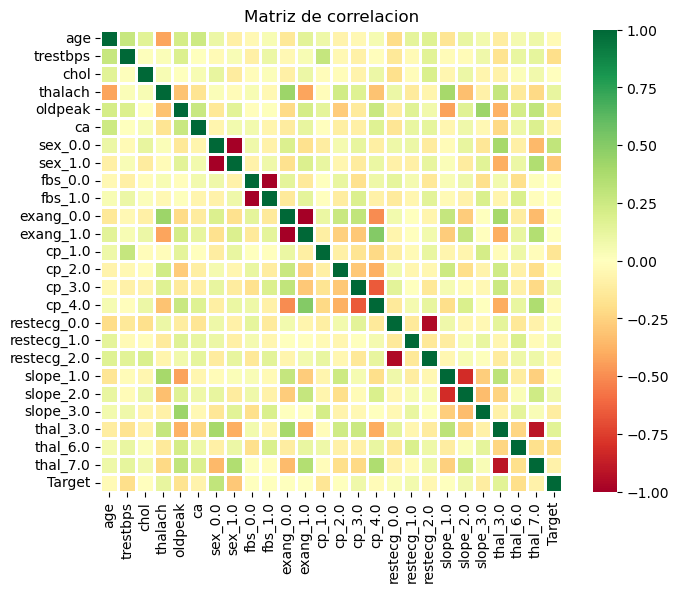

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
X_Y_Train = X_Train_encoded.copy()
X_Y_Train["Target"] = Y_Train
corr = X_Y_Train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='RdYlGn', center=0, square=True, linewidths=1)
plt.title("Matriz de correlacion")
plt.show()


De esta gráfica observamos que apenas ningun par esta muy correlacionado, a excepción de algunas como Thal-Target y oldpeak-slope. La información que podemos extraer de aqui es que ningun atributo por si solo esta muy correlada con el target (solo thal se acerca a una buena correlacion positiva) y que los atributos entre si no tienen apenas correlación (lo que nos indica, a priori, que no hay redundancia y que no debemos eliminar ninguo de estos atributos).

Cabe destacar que hay cierta correlación entre las variables que han surgido del One Hot Encoding, pero dicha correlacion es normal por la naturaleza de estas, no es necesario tenerlo en cuenta (conceptualmente, nos dice que si no es de una clase, pues es de otra, lo que no nos da nueva información).



## Sección II. Esquema lineal y selección de características

### *Regresión Logística: todas las variables*<br>

A continuación vamos a crear un modelo de **regresión logística** usando todas los atributos y sin ningun parámetro de regularización, pero primero escalaremos las variables que hagan falta para obtener mejores resultados.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
hiper_parametros = [{'C' : [0.001, 0.01, 0.1, 1, 10, 100], "solver" : ["lbfgs", "liblinear","newton-cg", "newton-cholesky", "sag", "saga"]}]
RegresionLogistica_GS = GridSearchCV(LogisticRegression(penalty=None,random_state= 314), hiper_parametros,  cv=10, scoring='accuracy')
RegresionLogistica_GS.fit(X_Train_scaled, Y_Train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty=None, random_state=314),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             scoring='accuracy')

In [15]:
RegresionLogistica_GS.best_score_

0.8233333333333333

## Regresión 1

ofmkmsdlkfvm

erfkmwlef

In [ ]:
wedqwedqedw

## Regresión 2

eiucheiucnjewjcn